In [1]:
#pip install selenium

import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [2]:
chromedriver = "C:/Users/anush/Downloads/chromedriver_win32/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.pmindia.gov.in/en/mann-ki-baat/")

ScrollNumber = 30
for i in range(1,ScrollNumber):
    driver.execute_script("window.scrollTo(1,50000)")
    time.sleep(5)

In [3]:
file = open('DS.html', 'w', encoding='utf-8')
file.write(driver.page_source)
file.close()

driver.close()

In [4]:
import urllib.request
import requests
from bs4 import BeautifulSoup

with open('DS.html', 'r', encoding='utf-8') as f:
    page = f.read()

parser = BeautifulSoup(page, 'html.parser')

links = []
for i in parser.find_all('div', attrs={'class' : 'mkb-news-wrapper'}):
    links.append(i.a['href'])

len(links)

74

In [5]:
def save_html(html, path):
    with open(path, 'wb') as f:
        f.write(html)
        
def open_html(path):
    with open(path, 'rb') as f:
        return f.read()

In [6]:
for i in range(len(links)) :
    speech_response =  requests.get(links[i])
    speech_content = speech_response.content
#     file = open('All_speech/speech'+str(i)+'.html', 'w', encoding='utf-8')
#     file.write(speech_response.content)
#     file.close()

#     with open('All_speech/speech'+str(i)+'.html', "w", encoding='utf-8') as f:
#       f.write(speech_response.content)
    
    save_html(speech_response.content, 'All_speech/speech'+str(len(links)-i)+'.html')
    file.close()
    
    time.sleep(10)
    speech_parser = BeautifulSoup(speech_content, 'html.parser')

    content = speech_parser.select(".content-block")
    #print(content)
   

In [33]:
speech_date = []
speech = []

for i in range(len(links)) :
    html = open_html('All_speech/speech'+str(i+1)+'.html')
    parser = BeautifulSoup(html, 'html.parser')
    speech_text = parser.select('.left-container')
    for s in speech_text : 
        date = s.select(".share_date .date")[0].text
        speech_date.append(date)
        speech_ = parser.select(".news-bg")[0].text
        speech.append(speech_)

In [40]:
# print(speech_date)
# print("\n")
# print(speech)

In [35]:
import pandas as pd

col1 = speech_date
col2 = speech
mann_ki_baat = pd.DataFrame(
    {'Speech_date': col1,
     'Speech': col2
    })
mann_ki_baat

,Speech_date,Speech
0,"03 Oct, 2014","My Dear Countrymen,\nToday is the holy festiva..."
1,"02 Nov, 2014","My dear fellow countrymen, \nI am with you aga..."
2,"14 Dec, 2014","\nMy Dear Fellow Countrymen,\nToday I have thi..."
3,"27 Jan, 2015","\n\n\n(Hon’ble Shri Narendra Modi):\nToday, Sh..."
4,"22 Feb, 2015","Hello, my young friends. Today probably the en..."
...,...,...
68,"29 Nov, 2020","My dear countrymen,\nNamaskar! I want to share..."
69,"27 Dec, 2020","My dear countrymen,\nNamaskar. Today is the 27..."
70,"31 Jan, 2021","My dear countrymen,\nNamaskar. When I express ..."
71,"28 Feb, 2021","My dear countrymen,\nNamaskar. Yesterday was t..."


In [37]:
cleaned = []
for date in mann_ki_baat['Speech_date']:
    clean = str(date).replace('\\n', '')
    clean = clean.replace("\'", '')
    cleaned.append(clean)
    
mann_ki_baat['Speech_date'] = cleaned

cleaned = []
for sp in mann_ki_baat['Speech']:
    clean = str(sp).replace('\n', '').replace("\'", '')
    clean = clean.replace('(Hon’ble Shri Narendra Modi):', '').replace('\\xa0', ' ')
    cleaned.append(clean)
    
mann_ki_baat['Speech'] = cleaned
mann_ki_baat

,Speech_date,Speech
0,"03 Oct, 2014","My Dear Countrymen,Today is the holy festival ..."
1,"02 Nov, 2014","My dear fellow countrymen, I am with you again..."
2,"14 Dec, 2014","My Dear Fellow Countrymen,Today I have this gr..."
3,"27 Jan, 2015","Today, Shri Barack Obama, President of the Uni..."
4,"22 Feb, 2015","Hello, my young friends. Today probably the en..."
...,...,...
68,"29 Nov, 2020","My dear countrymen,Namaskar! I want to share a..."
69,"27 Dec, 2020","My dear countrymen,Namaskar. Today is the 27th..."
70,"31 Jan, 2021","My dear countrymen,Namaskar. When I express Ma..."
71,"28 Feb, 2021","My dear countrymen,Namaskar. Yesterday was the..."


In [39]:
mann_ki_baat.to_csv("mann_ki_baat.csv")

In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [61]:
tokenized_sent=sent_tokenize(mann_ki_baat['Speech'][0])
print(tokenized_sent)

['My Dear Countrymen,Today is the holy festival of Vijay Dashami.', 'My heartiest greetings on this occasion of Vijay Dashami to one and all.Through the medium of radio, I would like to share few heartfelt thoughts with you today.', 'And, I hope that not only today, this series of conversation may be carried out regularly in future.', 'I will try my best, if possible, to take out time twice a month or even once to speak with you.', 'In future, I have also decided that whenever I will speak to you, it would be on Sundays and time would be morning 11.', 'In that way, it would be convenient for you too and I will feel contented with the fact that I am successful in sharing my thoughts with you.We are celebrating the festival of Vijay Dashami today, which symbolises the triumph of Good over Evil.', 'But one gentleman named Ganesh Venkatadari, a native of Mumbai, sent me a mail and has written to me that we must take a vow to eliminate ten bad habits from within ourselves on this occasion o

In [62]:
tokenized_word=word_tokenize(mann_ki_baat['Speech'][0])
print(tokenized_word)

['My', 'Dear', 'Countrymen', ',', 'Today', 'is', 'the', 'holy', 'festival', 'of', 'Vijay', 'Dashami', '.', 'My', 'heartiest', 'greetings', 'on', 'this', 'occasion', 'of', 'Vijay', 'Dashami', 'to', 'one', 'and', 'all.Through', 'the', 'medium', 'of', 'radio', ',', 'I', 'would', 'like', 'to', 'share', 'few', 'heartfelt', 'thoughts', 'with', 'you', 'today', '.', 'And', ',', 'I', 'hope', 'that', 'not', 'only', 'today', ',', 'this', 'series', 'of', 'conversation', 'may', 'be', 'carried', 'out', 'regularly', 'in', 'future', '.', 'I', 'will', 'try', 'my', 'best', ',', 'if', 'possible', ',', 'to', 'take', 'out', 'time', 'twice', 'a', 'month', 'or', 'even', 'once', 'to', 'speak', 'with', 'you', '.', 'In', 'future', ',', 'I', 'have', 'also', 'decided', 'that', 'whenever', 'I', 'will', 'speak', 'to', 'you', ',', 'it', 'would', 'be', 'on', 'Sundays', 'and', 'time', 'would', 'be', 'morning', '11', '.', 'In', 'that', 'way', ',', 'it', 'would', 'be', 'convenient', 'for', 'you', 'too', 'and', 'I', 'wil

In [99]:
tokenized_word_newww = []
for word in tokenized_word:
    word = str(word).lower()
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("”",'')
    word = word.replace("’",'')
    word = word.replace("*",'')
    if word in stop_words :
        pass
    else :
        tokenized_word_newww.append(word)

In [100]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_newww)
print(fdist)

<FreqDist with 540 samples and 1224 outcomes>


In [101]:
fdist.most_common(20)

[('', 260),
 ('nation', 20),
 ('one', 14),
 ('people', 10),
 ('take', 9),
 ('need', 9),
 ('countrymen', 8),
 ('like', 8),
 ('suggestions', 8),
 ('thoughts', 7),
 ('believe', 7),
 ('khaadi', 7),
 ('used', 7),
 ('sheep', 7),
 ('brother', 7),
 ('today', 6),
 ('vijay', 6),
 ('dashami', 6),
 ('125', 6),
 ('started', 6)]

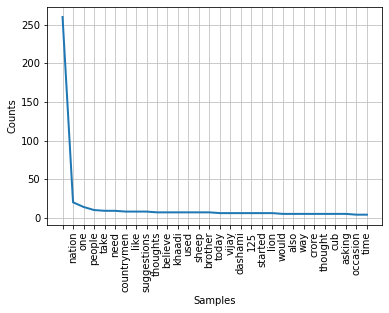

In [102]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [103]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)

{'having', 'has', 'them', 'yours', 's', 'll', 'myself', 'through', 'mustn', "weren't", 'o', 'when', 'aren', 'who', "you've", "you'd", 'some', 'a', "don't", 'nor', 'y', 'and', 'didn', 'to', 'same', 're', 'of', "it's", 'their', 'in', "aren't", 'they', 'were', 'can', 'she', 'for', 'ourselves', 'wouldn', "didn't", 'needn', "hasn't", 'yourselves', 'don', 'once', 'your', 'm', "mightn't", 'below', 'wasn', 'itself', 'my', 'by', 'than', 'what', 'again', "should've", 'haven', 'as', 'during', 'more', 'about', "mustn't", 'before', 'had', 'not', 'now', 'couldn', 'this', "won't", 'very', 'd', "shouldn't", 'be', 'each', "she's", 'have', 'ma', "shan't", 'i', 'mightn', 'into', 've', 'then', 'being', 'under', 'we', 'its', 'our', 'if', 'why', 'those', 'against', "isn't", 'off', 'he', 'himself', 'ain', 'until', 'over', 'isn', 'herself', 'just', 'so', 'between', 'how', 'themselves', 'shouldn', 'no', "couldn't", "wouldn't", "you'll", 'there', 'the', 'am', 'further', 'any', 'few', 'here', 'hasn', 'all', 'his

In [67]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("\n\nFilterd Sentence:",filtered_sent)

Tokenized Sentence: ['My Dear Countrymen,Today is the holy festival of Vijay Dashami.', 'My heartiest greetings on this occasion of Vijay Dashami to one and all.Through the medium of radio, I would like to share few heartfelt thoughts with you today.', 'And, I hope that not only today, this series of conversation may be carried out regularly in future.', 'I will try my best, if possible, to take out time twice a month or even once to speak with you.', 'In future, I have also decided that whenever I will speak to you, it would be on Sundays and time would be morning 11.', 'In that way, it would be convenient for you too and I will feel contented with the fact that I am successful in sharing my thoughts with you.We are celebrating the festival of Vijay Dashami today, which symbolises the triumph of Good over Evil.', 'But one gentleman named Ganesh Venkatadari, a native of Mumbai, sent me a mail and has written to me that we must take a vow to eliminate ten bad habits from within ourselve